In [2]:
{
    "tags": [
        "hide-input",
    ]
}
import warnings
warnings.filterwarnings('ignore')

In [6]:
import sys
# sys.path is a list of absolute path strings
sys.path.append('C:/Users/sunil/Desktop/Sem5/MP_work/RNN_work')

from emotion_recognition import EmotionRecognizer

In [9]:
my_model = SVC()
rec = EmotionRecognizer(model=my_model, emotions=['angry', 'sad', 'neutral', 'fear', 'happy'], balance=True, verbose=0)
# loads the best estimators from `grid` folder that was searched by GridSearchCV in `grid_search.py`,
# and set the model to the best in terms of test score, and then train it
rec.determine_best_model()
# get the determined sklearn model name
print(rec.model.__class__.__name__, "is the best")
# get the test accuracy score for the best estimator
print("Test score:", rec.test_score())

--------RESULTS--------
 [(MLPClassifier(alpha=0.01, batch_size=512, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=400), 0.8620967741935484), (SVC(C=10, gamma=0.001), 0.8540322580645161), (GradientBoostingClassifier(learning_rate=0.3, max_depth=7, subsample=0.7), 0.8524193548387097), (BaggingClassifier(max_features=0.5, n_estimators=50), 0.8451612903225807), (KNeighborsClassifier(n_neighbors=3, p=1, weights='distance'), 0.8362903225806452), (RandomForestClassifier(max_depth=7, max_features=0.5, n_estimators=40), 0.7596774193548387)] 
-------------------------------------------

MLPClassifier is the best
Test score: 0.8620967741935484


In [11]:
# this is a neutral speech from emo-db from the testing set
print("Prediction:", rec.predict("data/emodb/wav/15a04Nc.wav"))
# this is a sad speech from TESS from the testing set
print("Prediction:", rec.predict("data/validation/Actor_25/25_01_01_01_back_sad.wav"))

Prediction: neutral
Prediction: sad


Using RNN

In [12]:
from deep_emotion_recognition import DeepEmotionRecognizer

deeprec = DeepEmotionRecognizer(emotions=['angry', 'sad', 'neutral', 'fear', 'happy'], n_rnn_layers=2, n_dense_layers=2, 
                                rnn_units=128, dense_units=128)

# train 
deeprec.train()
print(deeprec.test_score())

# predict angry audio sample
prediction = deeprec.predict('data/validation/Actor_10/03-02-05-02-02-02-10_angry.wav')
print(f"Prediction: {prediction}")

[TESS&RAVDESS] There are 1129 training audio files for category:angry
[TESS&RAVDESS] There are 228 testing audio files for category:angry
[TESS&RAVDESS] There are 1133 training audio files for category:sad
[TESS&RAVDESS] There are 227 testing audio files for category:sad
[TESS&RAVDESS] There are 906 training audio files for category:neutral
[TESS&RAVDESS] There are 174 testing audio files for category:neutral
[TESS&RAVDESS] There are 1138 training audio files for category:fear
[TESS&RAVDESS] There are 222 testing audio files for category:fear
[TESS&RAVDESS] There are 1126 training audio files for category:happy
[TESS&RAVDESS] There are 228 testing audio files for category:happy
[+] Generated TESS & RAVDESS DB CSV File
[EMO-DB] Total files to write: 408
[EMO-DB] Training samples: 326
[EMO-DB] Testing samples: 81
[+] Generated EMO-DB CSV File
[Custom Dataset] There are 49 training audio files for category:neutral
[Custom Dataset] There are 33 testing audio files for category:neutral
[Cus

In [13]:
print(deeprec.predict_proba("data/emodb/wav/16a01Wb.wav"))

{'angry': 0.0341435, 'sad': 0.010625377, 'neutral': 0.022991372, 'fear': 0.79148155, 'happy': 0.14075829}


In [14]:
print(deeprec.confusion_matrix(percentage=True, labeled=True))

              predicted_angry  predicted_sad  predicted_neutral  \
true_angry          79.032257       0.403226           3.225806   
true_sad             0.806452      75.000000          10.080646   
true_neutral         7.258064      19.354837          68.548386   
true_fear            8.064516      15.322581           3.629032   
true_happy           8.467742       1.612903           4.032258   

              predicted_fear  predicted_happy  
true_angry          8.870968         8.467742  
true_sad            5.241935         8.870968  
true_neutral        0.403226         4.435484  
true_fear          65.725807         7.258064  
true_happy         10.080646        75.806450  


Not passing ay model and removing the custom dataset

In [10]:
from emotion_recognition import EmotionRecognizer
# initialize instance, this will take a bit the first time executed
# as it'll extract the features and calls determine_best_model() automatically
# to load the best performing model on the picked dataset
rec = EmotionRecognizer(emotions=['angry', 'sad', 'neutral', 'fear', 'happy'], balance=False, verbose=1, custom_db=False)
# it will be trained, so no need to train this time
# get the accuracy on the test set
print(rec.confusion_matrix())
# predict angry audio sample
prediction = rec.predict('data/validation/Actor_10/03-02-05-02-02-02-10_angry.wav')
print(f"Prediction: {prediction}")

[TESS&RAVDESS] There are 1129 training audio files for category:angry
[TESS&RAVDESS] There are 228 testing audio files for category:angry
[TESS&RAVDESS] There are 1133 training audio files for category:sad
[TESS&RAVDESS] There are 227 testing audio files for category:sad
[TESS&RAVDESS] There are 906 training audio files for category:neutral
[TESS&RAVDESS] There are 174 testing audio files for category:neutral
[TESS&RAVDESS] There are 1138 training audio files for category:fear
[TESS&RAVDESS] There are 222 testing audio files for category:fear
[TESS&RAVDESS] There are 1126 training audio files for category:happy
[TESS&RAVDESS] There are 228 testing audio files for category:happy
[+] Generated TESS & RAVDESS DB CSV File
[EMO-DB] Total files to write: 408
[EMO-DB] Training samples: 326
[EMO-DB] Testing samples: 81
[+] Generated EMO-DB CSV File
[surrey] Total files to write: 360
[surrey] Training samples: 288
[surrey] Testing samples: 71
[+] Generated Surrey DB CSV File


Extracting features for test: 100%|██████████| 1233/1233 [00:45<00:00, 18.88it/s]


[+] Data loaded


Evaluating BaggingClassifier: 100%|██████████| 6/6 [04:19<00:00, 31.16s/it]         


--------RESULTS--------
 [(GradientBoostingClassifier(learning_rate=0.3, max_depth=7, subsample=0.7), 0.8572587185725872), (BaggingClassifier(max_features=0.5, n_estimators=50), 0.8507704785077048), (KNeighborsClassifier(n_neighbors=3, p=1, weights='distance'), 0.8426601784266018), (MLPClassifier(alpha=0.01, batch_size=512, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=400), 0.8394160583941606), (SVC(C=10, gamma=0.001), 0.8369829683698297), (RandomForestClassifier(max_depth=7, max_features=0.5, n_estimators=40), 0.7664233576642335)] 
-------------------------------------------

[+] Best model determined: GradientBoostingClassifier with 85.726% test accuracy
              predicted_angry  predicted_sad  predicted_neutral  \
true_angry          98.818901       0.000000           0.000000   
true_sad             3.937008      87.007874           1.574803   
true_neutral        11.009174       5.504587          77.981651   
true_fear           10.887096       

In [15]:
rec.get_samples_by_class()

,train,test,total
angry,1290,254,1544
sad,1228,254,1482
neutral,1061,218,1279
fear,1241,248,1489
happy,1226,259,1485
total,6046,1233,7279


Histograms

[+] Model trained
[+] SVC with 1.0% (55) data samples achieved 93.818% Validation Score in 0.002s & 50.000% Test Score in 0.000s
[+] Model trained
[+] SVC with 10.0% (555) data samples achieved 93.818% Validation Score in 0.051s & 67.742% Test Score in 0.010s
[+] Model trained
[+] SVC with 100% (5555) data samples achieved 93.818% Validation Score in 2.117s & 85.403% Test Score in 0.595s

[+] Model trained
[+] RandomForestClassifier with 1.0% (55) data samples achieved 88.540% Validation Score in 0.066s & 33.333% Test Score in 0.005s
[+] Model trained
[+] RandomForestClassifier with 10.0% (555) data samples achieved 88.540% Validation Score in 0.606s & 74.194% Test Score in 0.007s
[+] Model trained
[+] RandomForestClassifier with 100% (5555) data samples achieved 88.540% Validation Score in 6.162s & 77.177% Test Score in 0.012s

[+] Model trained
[+] GradientBoostingClassifier with 1.0% (55) data samples achieved 94.769% Validation Score in 1.172s & 41.667% Test Score in 0.002s
[+] Mod

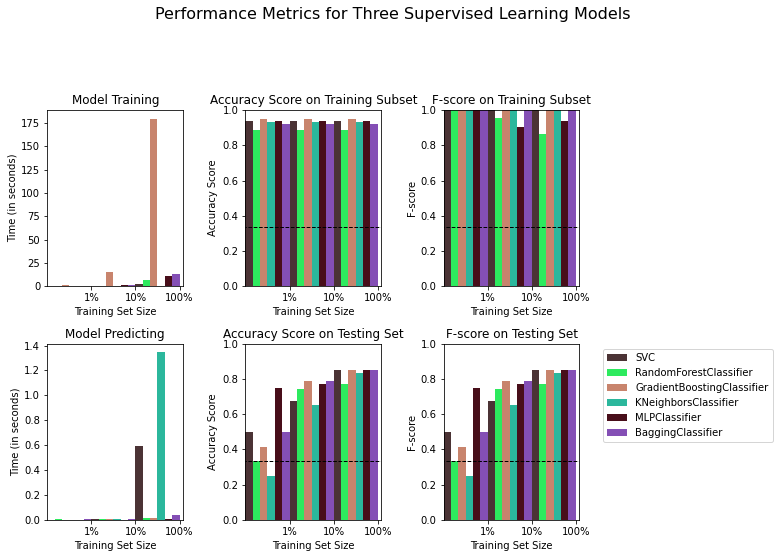

In [16]:
from emotion_recognition import plot_histograms
# plot histograms on different classifiers
plot_histograms(classifiers=True)